# **Importing modules**

In [1]:
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# **Preparing the data**

In [2]:
train_df = pd.read_csv('sign_mnist_train.csv')
train_df = train_df.sample(frac=1, random_state=42)
X, y = train_df.drop('label', axis=1), train_df['label']

# **Normalization and batching**

In [3]:
X /= 255.0
X = tf.reshape(X, [-1, 28, 28, 1])

# **Binarizes the labels (one-hot encoding)**

In [4]:
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

# **Separating the validation data**

In [5]:
X_train, X_test = X[:25000], X[25000:]
y_train, y_test = y[:25000], y[25000:]

# **Building the model**

In [6]:
model = Sequential()

model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(24, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# **Checkpoints**

In [7]:
save_best_cb = tf.keras.callbacks.ModelCheckpoint('models/initial-end-to-end', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5)

# **Finding patterns**

In [8]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[save_best_cb, early_stopping_cb])

Epoch 1/20
781/782 [============================>.] - ETA: 0s - loss: 0.8070 - accuracy: 0.7521

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 52s 65ms/step - loss: 0.8068 - accuracy: 0.7522 - val_loss: 0.1002 - val_accuracy: 0.9686
Epoch 2/20
781/782 [============================>.] - ETA: 0s - loss: 0.0247 - accuracy: 0.9939

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 51s 65ms/step - loss: 0.0247 - accuracy: 0.9939 - val_loss: 0.0052 - val_accuracy: 0.9992
Epoch 3/20
782/782 [==============================] - 47s 60ms/step - loss: 0.0268 - accuracy: 0.9926 - val_loss: 0.0130 - val_accuracy: 0.9951
Epoch 4/20
781/782 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 49s 63ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 1.3743e-04 - val_accuracy: 1.0000
Epoch 5/20
781/782 [============================>.] - ETA: 0s - loss: 8.0669e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 50s 64ms/step - loss: 8.0674e-05 - accuracy: 1.0000 - val_loss: 6.8239e-05 - val_accuracy: 1.0000
Epoch 6/20
781/782 [============================>.] - ETA: 0s - loss: 4.1297e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 48s 61ms/step - loss: 4.1297e-05 - accuracy: 1.0000 - val_loss: 3.8390e-05 - val_accuracy: 1.0000
Epoch 7/20
781/782 [============================>.] - ETA: 0s - loss: 2.4065e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 48s 61ms/step - loss: 2.4058e-05 - accuracy: 1.0000 - val_loss: 2.3384e-05 - val_accuracy: 1.0000
Epoch 8/20
781/782 [============================>.] - ETA: 0s - loss: 1.5155e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 50s 64ms/step - loss: 1.5154e-05 - accuracy: 1.0000 - val_loss: 1.5677e-05 - val_accuracy: 1.0000
Epoch 9/20
781/782 [============================>.] - ETA: 0s - loss: 9.7197e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 51s 65ms/step - loss: 9.7196e-06 - accuracy: 1.0000 - val_loss: 1.0093e-05 - val_accuracy: 1.0000
Epoch 10/20
781/782 [============================>.] - ETA: 0s - loss: 6.4418e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 49s 63ms/step - loss: 6.4406e-06 - accuracy: 1.0000 - val_loss: 6.7791e-06 - val_accuracy: 1.0000
Epoch 11/20
781/782 [============================>.] - ETA: 0s - loss: 4.2312e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 53s 68ms/step - loss: 4.2310e-06 - accuracy: 1.0000 - val_loss: 4.8179e-06 - val_accuracy: 1.0000
Epoch 12/20
781/782 [============================>.] - ETA: 0s - loss: 2.8371e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 52s 67ms/step - loss: 2.8362e-06 - accuracy: 1.0000 - val_loss: 3.6398e-06 - val_accuracy: 1.0000
Epoch 13/20
781/782 [============================>.] - ETA: 0s - loss: 1.8786e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 52s 66ms/step - loss: 1.8785e-06 - accuracy: 1.0000 - val_loss: 2.1094e-06 - val_accuracy: 1.0000
Epoch 14/20
781/782 [============================>.] - ETA: 0s - loss: 1.2550e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 56s 72ms/step - loss: 1.2547e-06 - accuracy: 1.0000 - val_loss: 1.4802e-06 - val_accuracy: 1.0000
Epoch 15/20
781/782 [============================>.] - ETA: 0s - loss: 8.4870e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 53s 68ms/step - loss: 8.4848e-07 - accuracy: 1.0000 - val_loss: 1.3189e-06 - val_accuracy: 1.0000
Epoch 16/20
781/782 [============================>.] - ETA: 0s - loss: 5.6664e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 54s 69ms/step - loss: 5.6647e-07 - accuracy: 1.0000 - val_loss: 7.8107e-07 - val_accuracy: 1.0000
Epoch 17/20
781/782 [============================>.] - ETA: 0s - loss: 3.7954e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 52s 66ms/step - loss: 3.7942e-07 - accuracy: 1.0000 - val_loss: 5.1392e-07 - val_accuracy: 1.0000
Epoch 18/20
781/782 [============================>.] - ETA: 0s - loss: 2.5377e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 56s 72ms/step - loss: 2.5390e-07 - accuracy: 1.0000 - val_loss: 3.5675e-07 - val_accuracy: 1.0000
Epoch 19/20
781/782 [============================>.] - ETA: 0s - loss: 1.7214e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 64s 82ms/step - loss: 1.7209e-07 - accuracy: 1.0000 - val_loss: 2.3298e-07 - val_accuracy: 1.0000
Epoch 20/20
781/782 [============================>.] - ETA: 0s - loss: 1.1370e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 64s 81ms/step - loss: 1.1384e-07 - accuracy: 1.0000 - val_loss: 1.5383e-07 - val_accuracy: 1.0000


# **Reviewing the model training**

In [9]:
with open('models/initial-end-to-end-history', 'wb') as history_file:
    pickle.dump(history.history, history_file)

# **Obtaining the best model**

In [10]:
best_model = tf.keras.models.load_model('models\\initial-end-to-end')

# **Performance on the test set**

In [12]:
def evaluate(model, X_test, y_test, label_binarizer):
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    y_test_labels = label_binarizer.transform(y_test)
    results = model.evaluate(X_test_reshape, y_test_labels)
    print(f'loss: {results[0]:.3f}, accuracy: {results[1]:.3f}')

# test set
test_df = pd.read_csv('sign_mnist_test.csv')
X_test, y_test = test_df.drop('label', axis=1), test_df['label'] # elimina este fila de los labels
X_test = tf.reshape(X_test, [-1, 28, 28, 1]) # toma los valores del csv y los representa como una matriz de 28x28 para representar la imagen
y_test = label_binarizer.transform(y_test)
best_model.evaluate(X_test, y_test)

225/225 [==============================] - 4s 16ms/step - loss: 119.9385 - accuracy: 0.9385


[119.93852233886719, 0.9385108947753906]

# **Converting images to sentence**

In [14]:
test_df = pd.read_csv('sign_mnist_test.csv')
X_test, y_test = test_df.drop('label', axis=1), test_df['label']
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

In [15]:
d = {chr(ord('a') + i):i for i in range(26)} # labels de 0-25
d_rev = {i:chr(ord('a') + 1) for i in range(26)}
d[' '] = d_rev[' '] = ' '

In [16]:
sentence = 'sign language'

for letter in sentence:
    print(d[letter], end=' ')

18 8 6 13   11 0 13 6 20 0 6 4 

In [17]:
best_model.predict(tf.reshape(X_test[0], [-1, 28, 28, 1]))

1/1 [==============================] - 0s 286ms/step


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
def test_on_sentence(model, sentence, X_test, y_test, label_binarizer, figsize=(20, 20)):

    sentence = sentence.lower()

    d = {chr(ord('a') + i):i for i in range(26)}
    d_rev = {i:chr(ord('a') + i) for i in range(26)}
    d[' '] = d_rev[' '] = ' '


    images_taken = []
    result = ''

    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])

    for letter in sentence:
        if letter != ' ':
            char_index = np.random.choice(y_test[y_test==ord(letter)-ord('a')].index)
            images_taken.append(char_index)
            y_pred = model.predict(tf.reshape(X_test_reshape[char_index], [1, 28, 28, 1]))
            result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
        else:
            result += ' '

    print(f'Actual sentence: {sentence}')
    print(f'Predicted sentence: {result}')

    images_taken.reverse()
    for word in sentence.split():
        fig, ax = plt.subplots(1, len(word), figsize=figsize)
        for i in range(len(word)):
            ax[i].imshow(X_test_reshape[images_taken.pop()], cmap='gray')
            ax[i].set_title(word[i])

1/1 [==============================] - 0s 40ms/step
Actual sentence: eduardo
Predicted sentence: eduardo


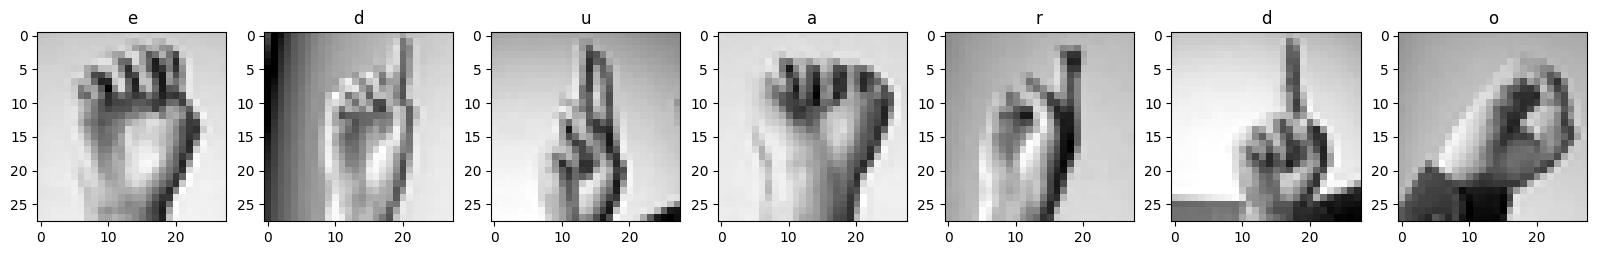

In [23]:
test_on_sentence(best_model, 'Eduardo', test_df.drop('label', axis=1), test_df['label'], label_binarizer)